In [55]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import tree

In [51]:
DATA_PATH = r"C:\Users\sahab\Downloads\Telegram Desktop\clean_data_no_leak.csv"

data = pd.read_csv(DATA_PATH, parse_dates=["Дата и время"]).drop(columns=["Unnamed: 0"])
# data['unix_timestamp'] = (
#     data['Дата и время'] - pd.Timestamp('1970-01-01')
# ) // pd.Timedelta('1s')

data = data[data["label"].isin([0, 1])]

data_label = data["label"]
data = data.drop(columns=['Дата и время', "label", "nan_num"])


In [52]:
X_train, X_test, y_train, y_test = train_test_split(
    data, data_label,
    test_size=0.2, random_state=42,
    shuffle=True
)

In [57]:
clf = DecisionTreeClassifier(random_state=42, max_depth=2)
clf = clf.fit(X_train, y_train)

In [58]:
print("Classification report:")
y_pred = clf.predict(X_test)

print(classification_report(y_test, y_pred))

Classification report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    166318
           1       1.00      1.00      1.00     37959

    accuracy                           1.00    204277
   macro avg       1.00      1.00      1.00    204277
weighted avg       1.00      1.00      1.00    204277



<Axes: ylabel='None'>

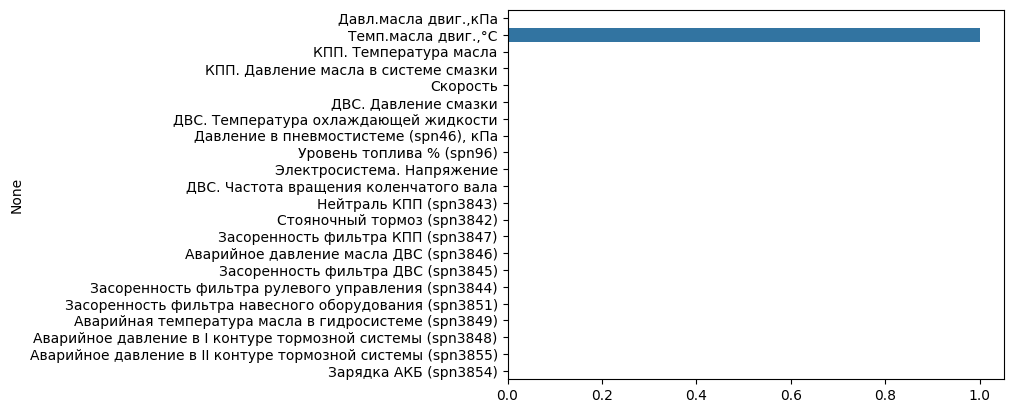

In [59]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.barplot(
    x=clf.feature_importances_,
    y=X_test.columns,
    orient="h"
)

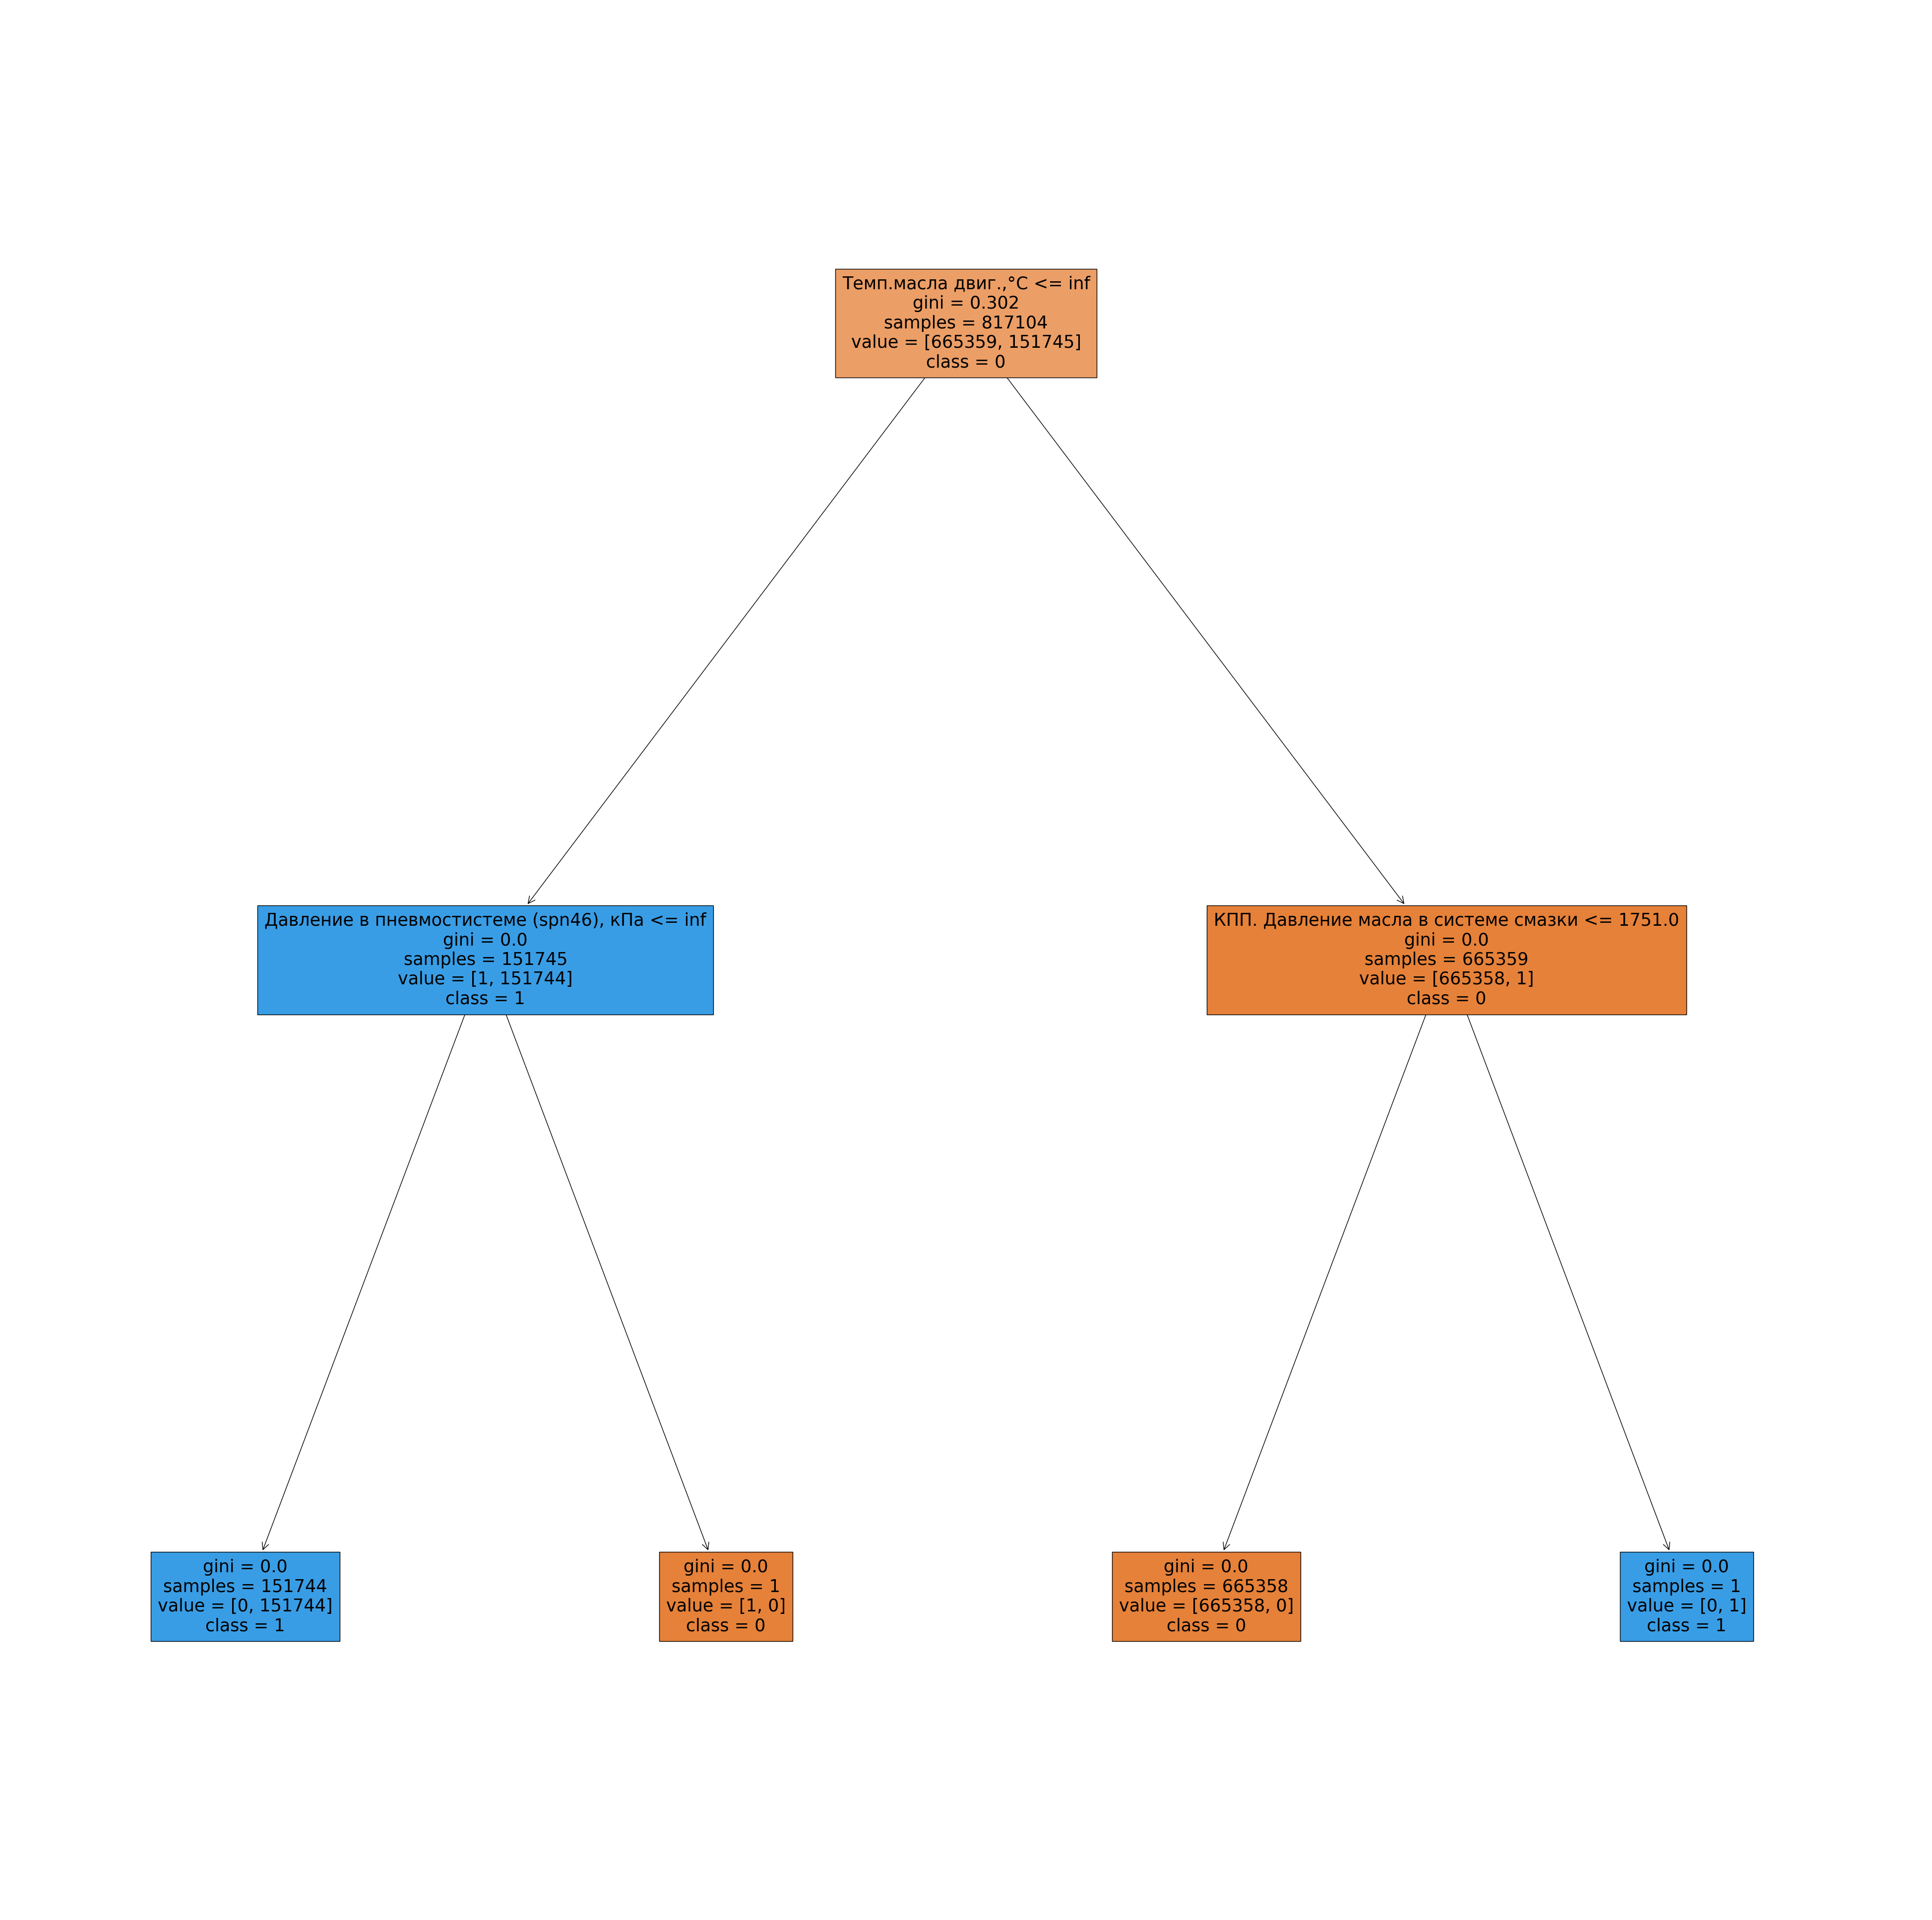

In [60]:
fig = plt.figure(figsize=(50, 50))
tree.plot_tree(
    clf,
    feature_names=X_test.columns,
    class_names=[str(x) for x in y_test.unique()],
    filled=True
)
plt.show()